In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('C:/Users/3333c/Desktop/학교/3-2/딥러닝응용/DSA_features.csv')

In [12]:
data

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [22]:
# 데이터 확인
print("전체 컬럼:", data.columns.tolist())

전체 컬럼: ['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std', 'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var', 'T_yacc_std', 'T_yacc_skew', 'T_zacc_mean', 'T_zacc_max', 'T_zacc_min', 'T_zacc_var', 'T_zacc_std', 'T_zacc_skew', 'T_xgyro_mean', 'T_xgyro_max', 'T_xgyro_min', 'T_xgyro_var', 'T_xgyro_std', 'T_xgyro_skew', 'T_ygyro_mean', 'T_ygyro_max', 'T_ygyro_min', 'T_ygyro_var', 'T_ygyro_std', 'T_ygyro_skew', 'T_zgyro_mean', 'T_zgyro_max', 'T_zgyro_min', 'T_zgyro_var', 'T_zgyro_std', 'T_zgyro_skew', 'T_xmag_mean', 'T_xmag_max', 'T_xmag_min', 'T_xmag_var', 'T_xmag_std', 'T_xmag_skew', 'T_ymag_mean', 'T_ymag_max', 'T_ymag_min', 'T_ymag_var', 'T_ymag_std', 'T_ymag_skew', 'T_zmag_mean', 'T_zmag_max', 'T_zmag_min', 'T_zmag_var', 'T_zmag_std', 'T_zmag_skew', 'RA_xacc_mean', 'RA_xacc_max', 'RA_xacc_min', 'RA_xacc_var', 'RA_xacc_std', 'RA_xacc_skew', 'RA_yacc_mean', 'RA_yacc_max', 'RA_yacc_min', 'RA_yacc_var', 'RA_yacc_std', 'RA_yacc_skew', 'RA_zacc_mean', 

In [26]:
# 데이터 타입 확인
print("\n데이터 타입:")
print(data.dtypes)


데이터 타입:
T_xacc_mean     float64
T_xacc_max      float64
T_xacc_min      float64
T_xacc_var      float64
T_xacc_std      float64
                 ...   
LL_zmag_var     float64
LL_zmag_std     float64
LL_zmag_skew    float64
activity         object
people           object
Length: 272, dtype: object


In [28]:
# 수치형 컬럼만 선택
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\n수치형 컬럼 수:", len(numeric_columns))


수치형 컬럼 수: 270


In [30]:
# lyingBack을 정상 상태로, standing을 비정상 상태로 설정
normal_data = data[data['activity'] == 'lyingBack']
abnormal_data = data[data['activity'] == 'standing']

In [32]:
# 수치형 특성만 선택
normal_features = normal_data[numeric_columns].values
abnormal_features = abnormal_data[numeric_columns].values

print("\n정상 데이터 shape:", normal_features.shape)
print("비정상 데이터 shape:", abnormal_features.shape)


정상 데이터 shape: (480, 270)
비정상 데이터 shape: (480, 270)


In [34]:
# 데이터가 비어있지 않은지 확인
if len(normal_features) == 0 or len(abnormal_features) == 0:
    raise ValueError("데이터가 비어 있습니다!")

# 데이터 스케일링
scaler = StandardScaler()
normal_scaled = scaler.fit_transform(normal_features)
abnormal_scaled = scaler.transform(abnormal_features)

# 학습/테스트 데이터 분할
X_train, X_test = train_test_split(normal_scaled, test_size=0.2, random_state=42)

print("\n학습 데이터 shape:", X_train.shape)
print("테스트 데이터 shape:", X_test.shape)


학습 데이터 shape: (384, 270)
테스트 데이터 shape: (96, 270)


In [36]:
# 1. 대칭형 오토인코더
def build_symmetric_autoencoder(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    
    # Encoder
    encoded = layers.Dense(32, activation='relu')(input_layer)
    encoded = layers.Dense(16, activation='relu')(encoded)
    
    # Decoder
    decoded = layers.Dense(32, activation='relu')(encoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

In [38]:
# 2. 비대칭형 오토인코더
def build_asymmetric_autoencoder(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    
    # Encoder (더 작은 구조)
    encoded = layers.Dense(24, activation='relu')(input_layer)
    encoded = layers.Dense(12, activation='relu')(encoded)
    
    # Decoder (더 큰 구조)
    decoded = layers.Dense(36, activation='relu')(encoded)
    decoded = layers.Dense(48, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

In [40]:
# 3. DAE (Denoising Autoencoder)
def build_dae(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    
    # 노이즈 추가 레이어
    noise = layers.GaussianNoise(0.2)(input_layer)
    
    # Encoder
    encoded = layers.Dense(32, activation='relu')(noise)
    encoded = layers.Dense(16, activation='relu')(encoded)
    
    # Decoder
    decoded = layers.Dense(32, activation='relu')(encoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder


In [42]:
# 모델 학습 및 평가 함수
def train_and_evaluate(model, X_train, X_test, abnormal_data):
    history = model.fit(X_train, X_train,
                       epochs=50,
                       batch_size=32,
                       validation_data=(X_test, X_test),
                       verbose=0)
    
    # 정상 데이터의 재구성 오차
    normal_pred = model.predict(X_test)
    normal_errors = np.mean(np.square(X_test - normal_pred), axis=1)
    
    # 비정상 데이터의 재구성 오차
    abnormal_pred = model.predict(abnormal_scaled)
    abnormal_errors = np.mean(np.square(abnormal_scaled - abnormal_pred), axis=1)
    
    return normal_errors, abnormal_errors, history

In [44]:
# 입력 차원 계산
input_dim = X_train.shape[1]

# 세 가지 모델 생성
symmetric_ae = build_symmetric_autoencoder(input_dim)
asymmetric_ae = build_asymmetric_autoencoder(input_dim)
dae = build_dae(input_dim)

In [46]:
# 각 모델 학습 및 평가
models = {
    'Symmetric AE': symmetric_ae,
    'Asymmetric AE': asymmetric_ae,
    'DAE': dae
}

results = {}
for name, model in models.items():
    normal_errors, abnormal_errors, history = train_and_evaluate(model, X_train, X_test, abnormal_scaled)
    results[name] = {
        'normal_errors': normal_errors,
        'abnormal_errors': abnormal_errors,
        'history': history
    }

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step


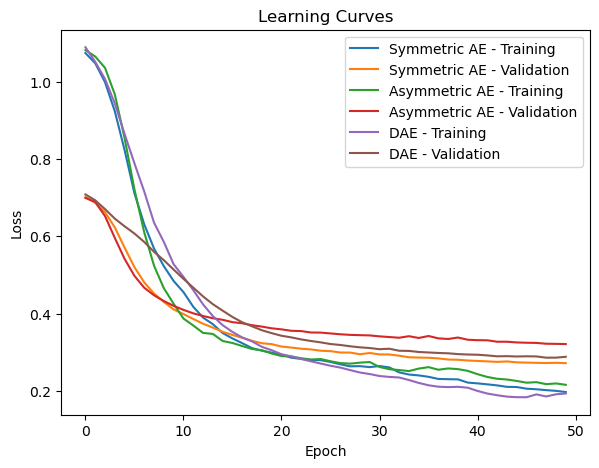

In [48]:
# 결과 시각화
plt.figure(figsize=(15, 5))

# 1. 학습 곡선
plt.subplot(1, 2, 1)
for name, result in results.items():
    plt.plot(result['history'].history['loss'], label=f'{name} - Training')
    plt.plot(result['history'].history['val_loss'], label=f'{name} - Validation')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()